<a href="https://colab.research.google.com/github/TehreenSherwani/uber/blob/main/Uber_TEHREEN_SHERWANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPOCESSING AND EXPLORATION


In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
uber = pd.read_csv("uber.csv")

# Explore the dataset
uber.head()



,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
uber.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
# Check for missing values
missing_values = uber.isnull().sum()
print(missing_values)

# Impute missing values with the mean
mean_fare = uber['fare_amount'].mean()
uber['fare_amount'].fillna(mean_fare, inplace=True)


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [11]:
 #Convert pickup_datetime to datetime
uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into features and target variable
X = uber.drop(['fare_amount'], axis=1)
y = uber['fare_amount']




In [21]:
# Exclude non-numeric columns before scaling
numeric_cols = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_cols]

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)


In [23]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [24]:
# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing set
X_test_scaled = scaler.transform(X_test)

In [25]:
# Calculate correlation matrix for numeric features only
correlation_matrix = X_numeric.corr()

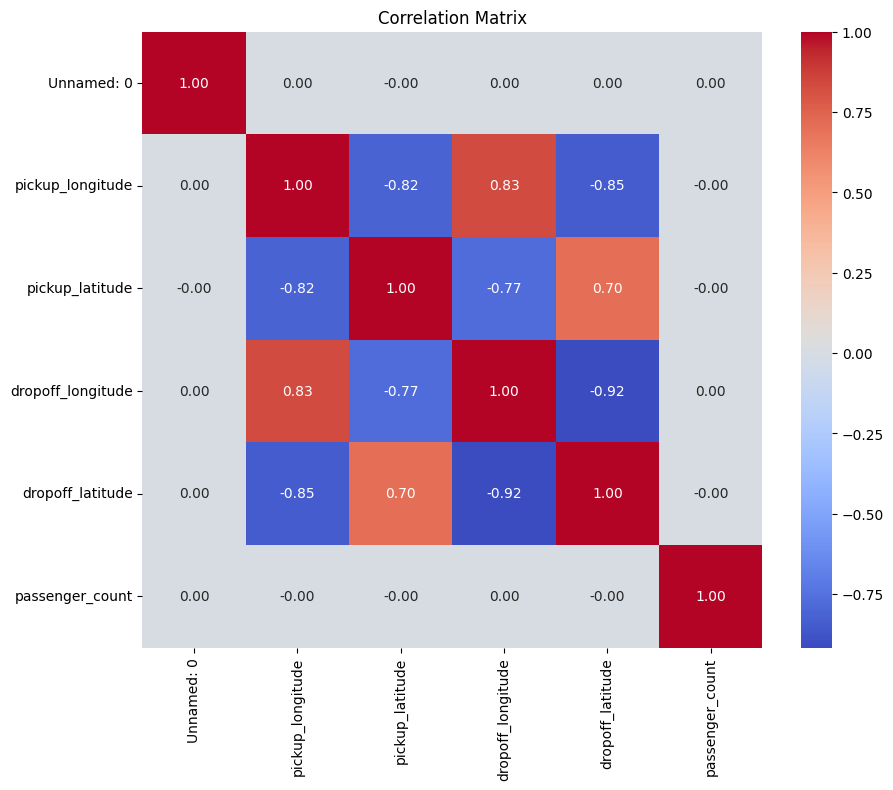

In [26]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()